In [1]:
# Import Libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ast

# Loading Data

df = pd.read_parquet('path/to/the/file/data_jobs.parquet')

# A bit of cleaning up

df['job_posted_date'] = pd.to_datetime(df['job_posted_date']) # Convert to a datetime datatype
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x) # Convert from 'str' to a list
df.sort_values(by='job_posted_date', inplace=True) # Sort the data by the date the job was added

# What is the earning potential for Data Roles based on their skills?

The dataset contains too few job offers in the Central European region that also include salaries, so the results would be biased. Therefore, job offers data from all over the world are now used to make the graph more representative. 

In [15]:
# Filter the DataFrame to include only rows where the salary column is not NaN
df_ww_jobs = df.dropna(subset=['salary_year_avg']).copy()

In [16]:
# Get the top 6 most frequent job titles to a list
job_titles = df_ww_jobs['job_title_short'].value_counts().index[:6].to_list()
job_titles

['Data Scientist',
 'Data Analyst',
 'Data Engineer',
 'Senior Data Scientist',
 'Senior Data Engineer',
 'Senior Data Analyst']

In [17]:
# Filter the DataFrame to include only rows with job titles in the Top 6 list
top6_jobs = df_ww_jobs[df_ww_jobs['job_title_short'].isin(job_titles)]
# Order the job titles by median salary
job_order = top6_jobs.groupby('job_title_short')['salary_year_avg'].median().sort_values(ascending=False).index

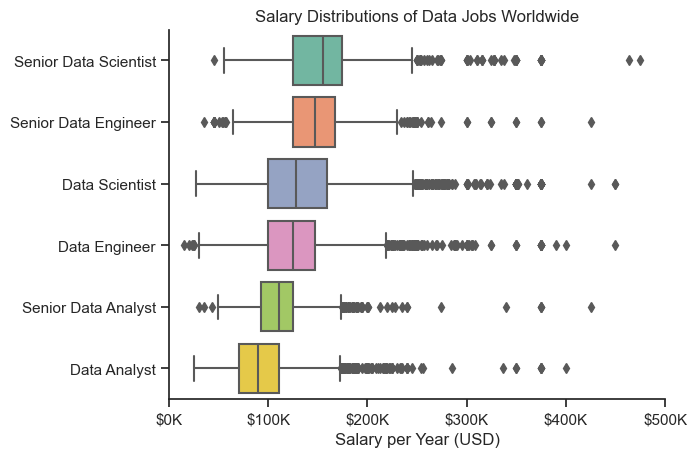

In [23]:
# Create a box plot with Seaborn
sns.boxplot(data=top6_jobs, x='salary_year_avg', y='job_title_short', order=job_order, palette='Set2')
sns.set_theme(style='ticks')
sns.despine()

# Set the labels and title
plt.title('Salary Distributions of Data Jobs Worldwide')
plt.xlabel('Salary per Year (USD)')
plt.ylabel('')
plt.xlim(0, 500000) # Set the limit for the x-axis 500K

# Format the x-axis ticks to display salaries in thousands (e.g., 50K, 100K)
ticks_x = plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}K')
plt.gca().xaxis.set_major_formatter(ticks_x)

plt.show()

In [26]:
df_ww_jobs = df.dropna(subset=['salary_year_avg']).copy()
df_ww_jobs = df_ww_jobs.explode('job_skills')

In [44]:
df_skills = df_ww_jobs.groupby('job_skills')['salary_year_avg'].agg(['count', 'median']).sort_values(by='count', ascending=False)

df_skills = df_skills.head(10).sort_values(by='median', ascending=False)

df_skills

,count,median
job_skills,,
spark,4016,140000.0
aws,4949,135000.0
java,2756,134241.0
python,12869,125000.0
azure,3466,125000.0
sql,12951,120000.0
r,5088,119550.0
tableau,4814,111175.0
sas,3132,110000.0


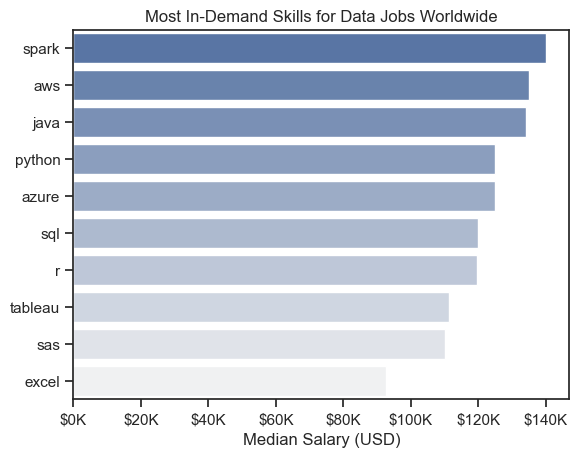

In [45]:
df_skills = df_skills.reset_index()

# Create a bar plot with Seaborn
sns.barplot(data=df_skills, x='median', y='job_skills', palette='light:b_r')
sns.set_theme(style='ticks')

# Set the labels and title
plt.title('Most In-Demand Skills for Data Jobs Worldwide')
plt.ylabel('')
plt.xlabel('Median Salary (USD)')

# Format the x-axis ticks to display salaries in thousands (e.g., 50K, 100K)
ticks_x = plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K')
plt.gca().xaxis.set_major_formatter(ticks_x)

plt.show()